#Gensim 내장 LDA 알고리즘 사용

#Install Mecab

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.


In [ ]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
!bash install_mecab-ko_on_colab190912.sh

In [ ]:
cd /content/mecab-ko-dic-2.1.1-20180720

/content/mecab-ko-dic-2.1.1-20180720


In [ ]:
ls user-dic

nnp.csv  person.csv  place.csv  README.md


In [ ]:
cp "/content/drive/My Drive/Colab Notebooks/output/nnp.csv" "./user-dic/nnp.csv"

In [ ]:
# 정상적으로 DRIVE에서 COPY 되었는지 확인
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f: 
    file_new = f.readlines() 
# file_new

In [ ]:
ls tools

add-userdic.sh*  convert_for_using_store.sh*  mecab-bestn.sh*


In [ ]:
!bash ./tools/add-userdic.sh

In [ ]:
!make install

make[1]: Entering directory '/content/mecab-ko-dic-2.1.1-20180720'
make[1]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /usr/bin/install -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'
make[1]: Leaving directory '/content/mecab-ko-dic-2.1.1-20180720'


In [ ]:
cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [ ]:
from collections import Counter

In [ ]:
from konlpy.tag import Mecab
import pandas as pd
from tqdm import tqdm

In [ ]:
def get_nouns_from_csv(path):
    '''
    requirement : pandas, mecab
    return : word_list
    
    입력받은 path에서 csv 파일을 읽어와 dataframe에 저장
    'text' col을 차례대로 Mecab을 이용해 형태소 분석하여 명사만 word_list에 추가
    '''  
    df = pd.read_csv(path, names=['text'], dtype={'text': str})
    mecab = Mecab()     # 형태소분석기 Mecab(사용자정의사전 추가)
    word_list = []
    
    for idx in tqdm(range(len(df))):
        try:
            nouns = mecab.nouns(df.loc[idx, 'text'])
            word_list.append(nouns)
        except Exception as e:
            countinue
    print("\nNoun Extraction Complete")

    return word_list

In [ ]:
# load article data and extract nouns
data_path = "data/MedicalDaily_crawling_edit.csv"
word_list = get_nouns_from_csv(path=data_path)

100%|██████████| 989/989 [00:03<00:00, 272.16it/s]


Noun Extraction Complete


# Topic Modeling(LDA)

In [ ]:
pip install pyLDAvis

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, 
                                            random_state=100, update_every=1, chunksize=100, 
                                            passes=10, alpha='auto', per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Install Java

In [ ]:
cd /content

/content


In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.9" 2020-10-20
OpenJDK Runtime Environment (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1, mixed mode, sharing)


#Install Mallet

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities


# spacy for lemmatization
import spacy
 
# Plotting tools
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
 
 
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
 
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import os.path
import re
import glob

import nltk
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
# create Dictionary
id2word=corpora.Dictionary(word_list)
id2word.filter_extremes(no_below=20)

# create Corpus
texts = word_list

# Term Document Frequency
corpus=[id2word.doc2bow(text) for text in texts]

## Human readable format of corpus (term-frequency)
# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [ ]:
pprint(ldamallet.show_topics(formatted=False))

[(3,
  [('의료', 0.169625059326056),
   ('정부', 0.036639772187944945),
   ('의협', 0.036070242050308496),
   ('기관', 0.026672994779307072),
   ('지원', 0.026008542952064548),
   ('정책', 0.018604651162790697),
   ('최대', 0.018224964404366398),
   ('의원', 0.017845277645942098),
   ('집', 0.017655434266729948),
   ('회장', 0.01727574750830565)]),
 (12,
  [('건강', 0.11189769353733729),
   ('보험', 0.05377940168988354),
   ('국민', 0.05046814341173784),
   ('개선', 0.039735099337748346),
   ('제도', 0.030143868463119432),
   ('급여', 0.027403516784654032),
   ('체계', 0.027289335464717974),
   ('강화', 0.0236355332267641),
   ('정책', 0.01918246174925782),
   ('심사', 0.017583923270153002)]),
 (13,
  [('의사', 0.08720864127345082),
   ('관련', 0.031381466742467314),
   ('치과', 0.030130756111426946),
   ('진료', 0.029789653212052302),
   ('행위', 0.018760659465605456),
   ('의료인', 0.016372939169982944),
   ('문제', 0.013644115974985787),
   ('해당', 0.012848209209778283),
   ('결정', 0.012620807276861854),
   ('인력', 0.012393405343945424)])

In [ ]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.5807320587866853


In [ ]:
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7     -0.000096 -0.000654       1        1  6.330011
3      0.000041  0.000126       2        1  6.024106
19     0.000131  0.000224       3        1  5.968913
5     -0.000781  0.000334       4        1  5.702471
10     0.000376  0.000504       5        1  5.292405
8     -0.000480 -0.000080       6        1  5.179113
16    -0.000325  0.000001       7        1  5.074128
12     0.000626 -0.000312       8        1  4.976902
13    -0.000017 -0.000014       9        1  4.956553
0     -0.000104 -0.000110      10        1  4.907938
4      0.000435 -0.000378      11        1  4.876104
14    -0.000002  0.000049      12        1  4.835471
6      0.000696 -0.000203      13        1  4.696472
1     -0.000170  0.000040      14        1  4.558632
11    -0.000173  0.001093      15        1  4.500475
17     0.000219 -0.000418      16        1  4.496329
18     0.000448  0.000676      17        1  4.492569
15     0.000149 -0.000540      18        1  4.488700
9      0.000087  0.000113      19        1  4.385152
2     -0.001061 -0.000452      20        1  4.257558, topic_info=     Term        Freq       Total Category  logprob  loglift
961    산하  135.000000  135.000000  Default  30.0000  30.0000
1092   수립  137.000000  137.000000  Default  29.0000  29.0000
1118    례  140.000000  140.000000  Default  28.0000  28.0000
46     진단  138.000000  138.000000  Default  27.0000  27.0000
836    취약  139.000000  139.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
422    화학    7.283238  144.193788  Topic20  -6.9481   0.1709
547     체    7.239947  143.841554  Topic20  -6.9541   0.1674
1176   문화    7.160652  140.633151  Topic20  -6.9651   0.1789
1184    협    7.211469  143.057610  Topic20  -6.9580   0.1689
766    망막    7.269256  147.710518  Topic20  -6.9500   0.1449

[776 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1160      1  0.069660   가슴
1160      2  0.069660   가슴
1160      3  0.055728   가슴
1160      4  0.048762   가슴
1160      5  0.041796   가슴
...     ...       ...  ...
423      16  0.044343   희망
423      17  0.044343   희망
423      18  0.044343   희망
423      19  0.044343   희망
423      20  0.044343   희망

[11920 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 20, 6, 11, 9, 17, 13, 14, 1, 5, 15, 7, 2, 12, 18, 19, 16, 10, 3])

In [ ]:
#트윗들의 토픽을 확인 (토픽별로)
def format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=texts):
    sent_topics_df = pd.DataFrame()

    #ldamodel[corpus]: lda_model에 corpus를 넣어 각 토픽 당 확률을 알 수 있음
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: 
                wp = ldamodel.show_topic(topic_num,topn=20)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=texts)
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


df_dominant_topic=df_dominant_topic.sort_values(by=['Dominant_Topic'])
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
744,744,0.0,0.2509,"원, 진료, 평가, 기관, 관리, 만, 입원, 비용, 전문, 차, 감염, 의료, 인...","[정부, 정책, 재정, 지원, 필요, 일, 서울대, 병원, 심포지엄, 법, 구체, ..."
405,405,0.0,0.2367,"원, 진료, 평가, 기관, 관리, 만, 입원, 비용, 전문, 차, 감염, 의료, 인...","[병, 이상, 병원, 감염, 병상, 이하, 병원, 대형, 종합, 병원, 감염, 이명..."
495,495,0.0,0.3909,"원, 진료, 평가, 기관, 관리, 만, 입원, 비용, 전문, 차, 감염, 의료, 인...","[통합, 수련, 교육, 입원, 전담, 전문, 제도, 정착, 디딤돌, 역할, 다짐, ..."
390,390,0.0,0.5144,"원, 진료, 평가, 기관, 관리, 만, 입원, 비용, 전문, 차, 감염, 의료, 인...","[등급, 기관, 권역, 분포, 건강, 보험, 심사, 평가, 원, 원장, 김승택, 이..."
86,86,0.0,0.1839,"원, 진료, 평가, 기관, 관리, 만, 입원, 비용, 전문, 차, 감염, 의료, 인...","[세계, 최초, 급성, 뇌경색, 환자, 예후, 장기, 비용, 지출, 분석, 연구, ..."
...,...,...,...,...,...
502,502,19.0,0.3592,"수술, 후, 술, 로봇, 시행, 내시경, 통증, 부위, 합병증, 절제술, 절제, 복...","[실제, 내시경, 수술, 환경, 시뮬레이션, 수술, 성공, 서울, 대학교, 병원, ..."
754,754,19.0,0.3819,"수술, 후, 술, 로봇, 시행, 내시경, 통증, 부위, 합병증, 절제술, 절제, 복...","[전체, 일부, 절제, 제거, 것, 신장, 절제, 수술, 로봇, 수술, 부작용, 최..."
760,760,19.0,0.1711,"수술, 후, 술, 로봇, 시행, 내시경, 통증, 부위, 합병증, 절제술, 절제, 복...","[경희대병원, 정형외과, 이강, 교수, 환자, 명, 수술, 완치, 보존, 치료, 수..."
464,464,19.0,0.1518,"수술, 후, 술, 로봇, 시행, 내시경, 통증, 부위, 합병증, 절제술, 절제, 복...","[서울, 대학교, 병원, 소화기, 내과, 이상협, 교수, 연구, 팀, 년, 개, 의..."


In [ ]:
# 각 토픽에서 가장 대표적인 문장 찾기
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)


sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts.sort_index(inplace=True)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution

lda_inform = pd.concat([sent_topics_sorteddf_mallet, topic_counts, topic_contribution], axis=1)
lda_inform.columns=["Topic_Num", "Topic_Perc_Contrib", "Keywords", "Text", "Num_Documents", "Perc_Documents"]


lda_inform

,Topic_Num,Topic_Perc_Contrib,Keywords,Text,Num_Documents,Perc_Documents
0.0,0.0,0.5972,"원, 진료, 평가, 기관, 관리, 만, 입원, 비용, 전문, 차, 감염, 의료, 인...","[대형, 병원, 하루, 인, 실, 병실, 료, 천차만별, 것, 곳, 평균, 만, 원...",30,0.0303
1.0,1.0,0.3433,"세계, 서울, 센터, 서울대, 국내, 월, 국제, 미국, 분당, 대학교, 최초, 수...","[간우, 엽, 절제술, 간우, 후, 구역, 절제술, 등, 세계, 최초, 수술, 기록...",18,0.0182
2.0,2.0,0.4674,"심장, 혈관, 시술, 이식, 혈액, 신장, 내, 질환, 성공, 장기, 세브, 란스,...","[국내, 청소년, 체내, 인공, 심장, 이식술, 성공, 생존, 삶, 질, 향상, 도...",52,0.0526
3.0,3.0,0.5124,"의료, 정부, 의협, 기관, 지원, 정책, 최대, 의원, 집, 회장, 상황, 코로나...","[동네, 의원, 포함, 조세, 특례, 한법, 개정안, 국회, 통과, 주력대, 의사,...",76,0.0768
4.0,4.0,0.4798,"암, 생존, 위암, 발생, 검진, 유방암, 종양, 재발, 간암, 유방, 폐암, 항암...","[화순, 전남, 병원, 남대, 병원, 년, 생존, 수도, 년, 간, 연평균, 증가,...",60,0.0607
5.0,5.0,0.6008,"위험, 발생, 질환, 당뇨병, 배, 사망, 뇌졸중, 증가, 고혈압, 체중, 심혈, ...","[망막, 중심, 동맥, 폐쇄, 발생, 후, 달, 간, 허혈, 뇌졸중, 위험, 배, ...",64,0.0647
6.0,6.0,0.4925,"조사, 학회, 예방, 활동, 개, 지역, 필요, 가족, 학술, 관리, 발표, 사회,...","[국민, 잉, 부처, 노력, 공감, 서울, 대학교, 의과, 대학, 스마트, 건강, ...",28,0.0283
7.0,7.0,0.7399,"회장, 협회, 회원, 사회, 이사, 위원회, 의협, 부회장, 의사, 개최, 위원장,...","[기금, 관리, 분과, 회관, 건축, 분과, 위원, 人, 임명, 완료, 의료, 숙원...",81,0.0819
8.0,8.0,0.4223,"개발, 기술, 활용, 정보, 데이터, 시스템, 기반, 정밀, 사업, 임상, 분석, ...","[분석, 툴, 기본, 통계, 분석, 머신, 러닝, 딥, 러닝, 등, 분석, 기능, ...",52,0.0526
9.0,9.0,0.2252,"시간, 월, 필요, 위, 진행, 발생, 가능, 이후, 정도, 분, 최근, 때, 때문...","[만, 대, 사, 외과학, 회지, 게, 재비, 대사, 수술, 부작용, 발생, 위, ...",6,0.0061


In [ ]:
pip install WordCloud

In [ ]:
from wordcloud import WordCloud 

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)

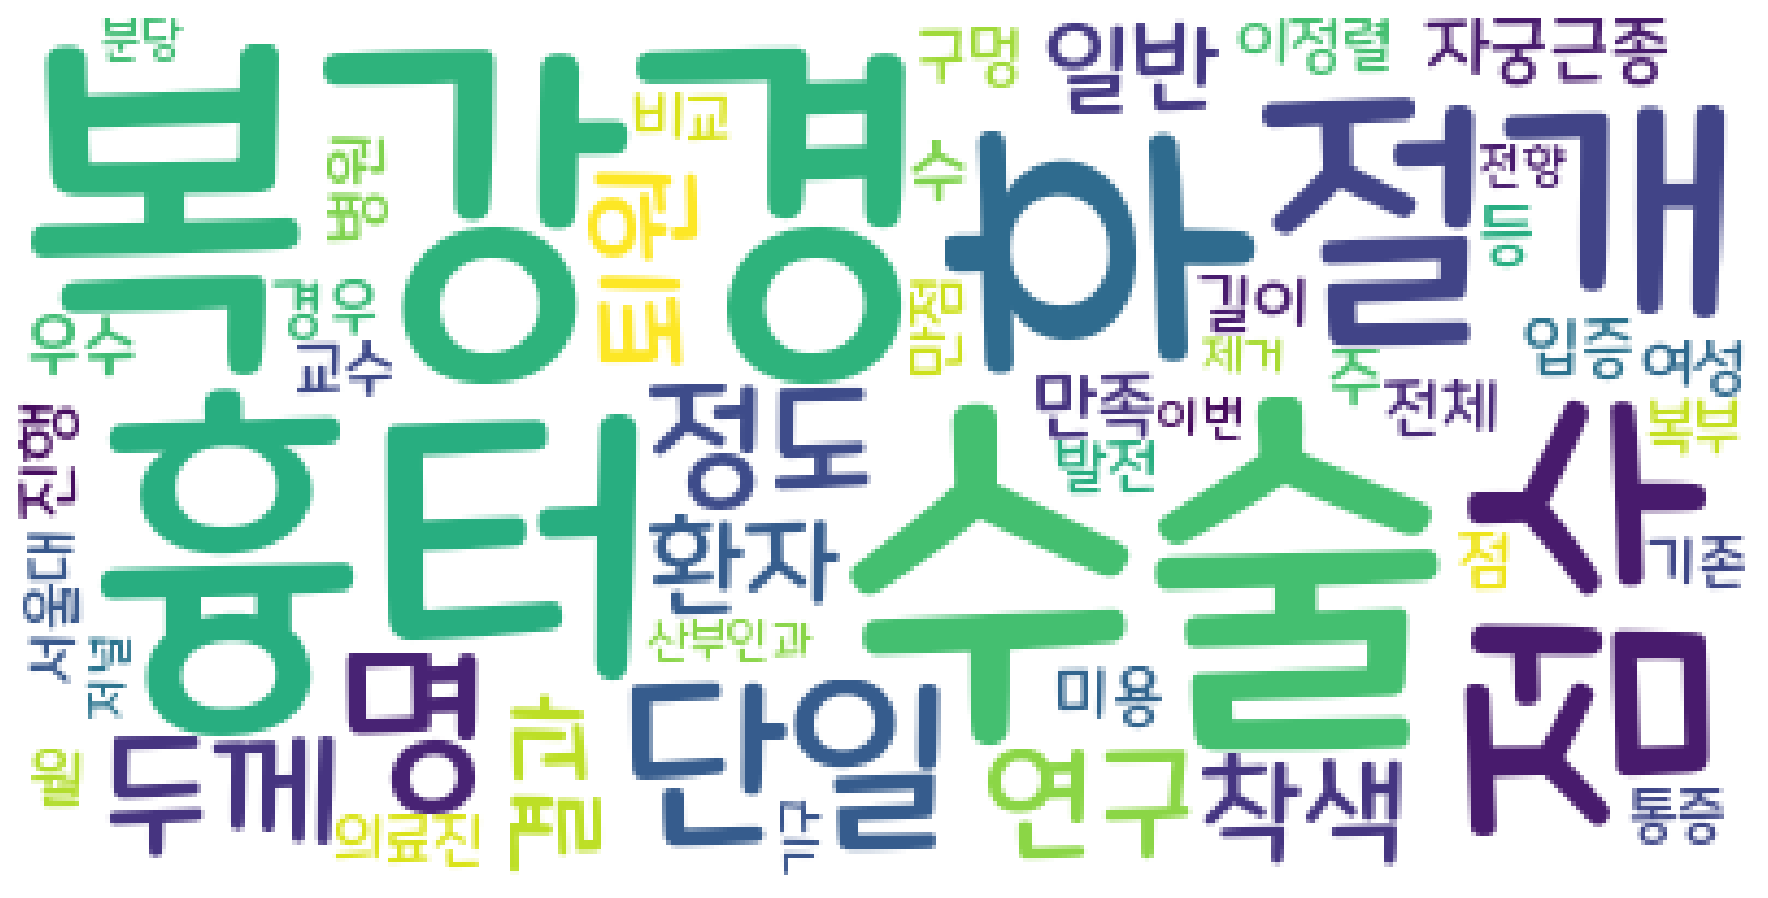

In [ ]:
#토픽별 word cloud
def flatten(l):
    flatList=[]
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList


for i in range(20):
    data_list = lda_inform.loc[i, 'Text']
    data_word=[]
    
    for j in range(len(data_list)):
        try:
            data_word.append(mecab.nouns(data_list[j]))
        except Exception as e:
            continue       
data_word=flatten(data_word)
data_word=[x for x in data_word if not x.isdigit()]
    
freq=pd.Series(data_word).value_counts().head(50)
freq=dict(freq)
    
wordcloud = WordCloud(font_path="/content/drive/My Drive/Colab Notebooks/data/Maplestory Light.ttf",
             relative_scaling = 0.2,
             background_color = 'white',
            ).generate_from_frequencies(freq)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
def format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=texts):
# Init output
    sent_topics_df = pd.DataFrame()
 
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
 
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
 
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=texts)
 
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
 
# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.1774,"개발, 기술, 활용, 정보, 데이터, 시스템, 기반, 정밀, 사업, 임상","[이, 과학, 학술지, 네이처, 자매지, 사이언, 티, 픽, 리포트, 최근, 논문,..."
1,1,3.0,0.1139,"의료, 정부, 의협, 기관, 지원, 정책, 최대, 의원, 집, 회장","[질병관리본부, 자료, 기반, 코로나19, 기간, 방역, 관리, 수칙, 강화, 인플..."
2,2,18.0,0.2339,"기능, 증상, 장애, 질환, 노인, 치매, 뇌, 만성, 이상, 점","[노인, 주요, 만성, 질환, 관리, 약제, 관리, 재활, 서비스, 등, 협진, 서..."
3,3,2.0,0.1618,"심장, 혈관, 시술, 이식, 혈액, 신장, 내, 질환, 성공, 장기","[美, 獨, 日, 생산, 국내, 조, 천, 억, 지출, 서울, 대학교, 병원, 시노..."
4,4,7.0,0.2845,"회장, 협회, 회원, 사회, 이사, 위원회, 의협, 부회장, 의사, 개최","[최대, 집, 회장, 요구, 관철, 것, 의지, 피력, 한국, 학교, 육, 협의회,..."
5,5,19.0,0.3641,"수술, 후, 술, 로봇, 시행, 내시경, 통증, 부위, 합병증, 절제술","[골육종, 완치, 인공, 관절, 삽입, 합병증, 차단, 서울대, 학교, 병원, 정형..."
6,6,18.0,0.1644,"기능, 증상, 장애, 질환, 노인, 치매, 뇌, 만성, 이상, 점","[연구, 팀, 참가자, 명, 중, 명, 챗, 봇, 기반, 행동, 치료, 주, 동안,..."
7,7,17.0,0.2210,"검사, 진단, 영상, 소아, 정확, 때문, 질환, 조기, 확인, 필요","[난치성, 원발성, 융모암, 항암, 화학, 요법, 치료, 성공, 사례, 병변, 선별..."
8,8,3.0,0.2733,"의료, 정부, 의협, 기관, 지원, 정책, 최대, 의원, 집, 회장","[구체, 방안, 의료, 중론, 정부, 여당, 선제, 방침, 의사, 협회, 회장, 최..."
9,9,2.0,0.1953,"심장, 혈관, 시술, 이식, 혈액, 신장, 내, 질환, 성공, 장기","[이대목동병원, 박준범, 교수, 순환기, 내과, 일, 부정맥, 심정지, 환자, 위험..."


In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()
 
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
 
for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
        grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)],
        axis=0)
 
# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
 
# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
 
# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.5972,"원, 진료, 평가, 기관, 관리, 만, 입원, 비용, 전문, 차","[대형, 병원, 하루, 인, 실, 병실, 료, 천차만별, 것, 곳, 평균, 만, 원..."
1,1.0,0.3433,"세계, 서울, 센터, 서울대, 국내, 월, 국제, 미국, 분당, 대학교","[간우, 엽, 절제술, 간우, 후, 구역, 절제술, 등, 세계, 최초, 수술, 기록..."
2,2.0,0.4674,"심장, 혈관, 시술, 이식, 혈액, 신장, 내, 질환, 성공, 장기","[국내, 청소년, 체내, 인공, 심장, 이식술, 성공, 생존, 삶, 질, 향상, 도..."
3,3.0,0.5124,"의료, 정부, 의협, 기관, 지원, 정책, 최대, 의원, 집, 회장","[동네, 의원, 포함, 조세, 특례, 한법, 개정안, 국회, 통과, 주력대, 의사,..."
4,4.0,0.4798,"암, 생존, 위암, 발생, 검진, 유방암, 종양, 재발, 간암, 유방","[화순, 전남, 병원, 남대, 병원, 년, 생존, 수도, 년, 간, 연평균, 증가,..."


In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
 
# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
 
# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]
 
# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
 
# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']
 
# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,8.0,"개발, 기술, 활용, 정보, 데이터, 시스템, 기반, 정밀, 사업, 임상",30.0,0.0303
1.0,3.0,"의료, 정부, 의협, 기관, 지원, 정책, 최대, 의원, 집, 회장",18.0,0.0182
2.0,18.0,"기능, 증상, 장애, 질환, 노인, 치매, 뇌, 만성, 이상, 점",52.0,0.0526
3.0,2.0,"심장, 혈관, 시술, 이식, 혈액, 신장, 내, 질환, 성공, 장기",76.0,0.0768
4.0,7.0,"회장, 협회, 회원, 사회, 이사, 위원회, 의협, 부회장, 의사, 개최",60.0,0.0607
...,...,...,...,...
984.0,19.0,"수술, 후, 술, 로봇, 시행, 내시경, 통증, 부위, 합병증, 절제술",NaN,NaN
985.0,7.0,"회장, 협회, 회원, 사회, 이사, 위원회, 의협, 부회장, 의사, 개최",NaN,NaN
986.0,2.0,"심장, 혈관, 시술, 이식, 혈액, 신장, 내, 질환, 성공, 장기",NaN,NaN
987.0,12.0,"건강, 보험, 국민, 개선, 제도, 급여, 체계, 강화, 정책, 심사",NaN,NaN
